<a href="https://colab.research.google.com/github/LDSoul/NCUT_project/blob/master/%E5%88%9D%E5%BF%83%E8%80%85(Train_Test%E9%81%8B%E7%94%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

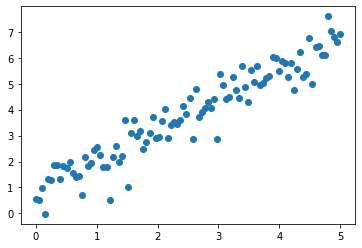

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#將線性回歸函式庫載入
from sklearn.linear_model import LinearRegression

#產生假資料
x = np.linspace(0,5,100) #在指定的間隔返回均勻數字 [start,stop,數量]
y = 1.2 * x + 0.8 + 0.5 * np.random.randn(100) 

plt.scatter(x,y)

In [ ]:
print(x)
print(y)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

In [ ]:
#若overfitting話
#進行機器學習的時候，就需區分 訓練用data(總資料的80%) 以及 測試用data(總資料的20%)，
#train_test_split，自動亂數取出總資料的20%，當測試的時候用
#測試用data不會參與訓練的過程
from sklearn.model_selection import train_test_split

#train_test_split會自動把資料分類為 x_train, x_test, y_train, y_test
#測試資料佔的比例暫訂為20%, 因此test_size = 0.2
#random_state請輸入一個隨便的數字
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2,
                                                    random_state=87
                                                   )
#確認x_train的大小
len(x_train)

80

In [ ]:
print(x_train[0])

[3.38383838]


In [ ]:
#然後把分類後的四個array轉製成80x1, 才能作訓練
#以後要是使用sklearn直接提供的真實世界的資料的話，不要再做轉置矩陣的動作！
x_train = x_train.reshape(80,1)
x_test.shape = (20,1)
y_train = y_train.reshape(80,1)
y_test = y_test.reshape(20,1)

In [ ]:
#首先開一台線性回歸機
regr = LinearRegression()

#以訓練資料來做訓練
regr.fit(x_train,y_train)
y_train_result = regr.predict(x_train)

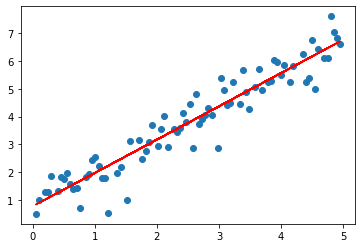

In [ ]:
#然後就可以來檢查是否機器學習出來的曲線是否跟原本的曲線接近
#這就是訓練資料產生的預測曲線
#當然自己訓練出來的曲線，一定會很相近的
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_result,'r')

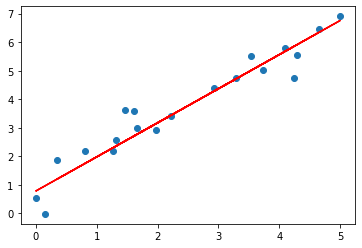

In [ ]:
#接下來拿測試資料與剛才預測出來的曲線做比較，檢查是否接近？
#注意這裡的regr.predict(x_test)，帶入的參數是x_test
#這樣才是把 測試的點代入預測曲線 的方式
plt.scatter(x_test,y_test)
plt.plot(x_test,regr.predict(x_test),'r')
#看起來還蠻精準的！表示此線性回歸成功！Skikit讚！